In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_PATH = '/content/drive/MyDrive/멋사/mid project/'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [5]:
# 한글깨짐
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,412 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and dire

In [6]:
org_df = pd.read_csv(DATA_PATH + 'train.csv')
org_df.head()

,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,PBLPRFR_TIME,GENRE_NM,PRC_CN,HMPG_URL,SETLE_DE,SETLE_TIME,DSCNT_CN,SETLE_PRICE,MBER_GRAD_NM,BN_VALUE,SEXDSTN_VALUE,OC_AREA_NM,RFN_AT
0,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230308,70000,기타 할인,24000.0,무료,50대,F,경기,N
1,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230221,190000,기타 할인,10000.0,블루,60대,M,서울,N
2,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230228,10000,기타 할인,8000.0,무료,60대,M,서울,N
3,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230226,100000,기타 할인,24000.0,무료,40대,M,서울,N
4,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230320,230000,골드회원 할인40%,18000.0,골드,60대,F,서울,N


In [7]:
hall_df = pd.read_csv(DATA_PATH + '공연시설별좌석수.csv')
hall_df.head()

,PBLPRFR_PLACE_NM,총판매석,일반판매석,장애인석,OP석,판매유보석
0,CJ 토월극장,1004,842,10,63,89
1,IBK챔버홀,600,594,6,0,0
2,리사이틀홀,354,350,4,0,0
3,오페라극장,2283,1925,20,48,290
4,인춘아트홀,100,98,2,0,0


In [8]:
# 원본에 공연장 정보 조인
org_hall_df = pd.merge(org_df, hall_df, on='PBLPRFR_PLACE_NM', how='left')
org_hall_df.head()

,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,PBLPRFR_TIME,GENRE_NM,PRC_CN,HMPG_URL,SETLE_DE,SETLE_TIME,DSCNT_CN,...,MBER_GRAD_NM,BN_VALUE,SEXDSTN_VALUE,OC_AREA_NM,RFN_AT,총판매석,일반판매석,장애인석,OP석,판매유보석
0,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230308,70000,기타 할인,...,무료,50대,F,경기,N,2505.0,2481.0,24.0,0.0,0.0
1,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230221,190000,기타 할인,...,블루,60대,M,서울,N,2505.0,2481.0,24.0,0.0,0.0
2,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230228,10000,기타 할인,...,무료,60대,M,서울,N,2505.0,2481.0,24.0,0.0,0.0
3,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230226,100000,기타 할인,...,무료,40대,M,서울,N,2505.0,2481.0,24.0,0.0,0.0
4,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,https://www.sac.or.kr/site/main/show/show_view...,20230320,230000,골드회원 할인40%,...,골드,60대,F,서울,N,2505.0,2481.0,24.0,0.0,0.0


In [9]:
org_hall_df.drop('HMPG_URL', axis=1, inplace=True)
org_hall_df.head()

,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,PBLPRFR_TIME,GENRE_NM,PRC_CN,SETLE_DE,SETLE_TIME,DSCNT_CN,SETLE_PRICE,MBER_GRAD_NM,BN_VALUE,SEXDSTN_VALUE,OC_AREA_NM,RFN_AT,총판매석,일반판매석,장애인석,OP석,판매유보석
0,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230308,70000,기타 할인,24000.0,무료,50대,F,경기,N,2505.0,2481.0,24.0,0.0,0.0
1,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230221,190000,기타 할인,10000.0,블루,60대,M,서울,N,2505.0,2481.0,24.0,0.0,0.0
2,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230228,10000,기타 할인,8000.0,무료,60대,M,서울,N,2505.0,2481.0,24.0,0.0,0.0
3,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230226,100000,기타 할인,24000.0,무료,40대,M,서울,N,2505.0,2481.0,24.0,0.0,0.0
4,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230320,230000,골드회원 할인40%,18000.0,골드,60대,F,서울,N,2505.0,2481.0,24.0,0.0,0.0


In [10]:
org_hall_df.RFN_AT = org_hall_df.RFN_AT.replace({'N': 0, 'Y': 1})
org_hall_df.head()

<ipython-input-10-5cbef2906a84>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  org_hall_df.RFN_AT = org_hall_df.RFN_AT.replace({'N': 0, 'Y': 1})


,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,PBLPRFR_TIME,GENRE_NM,PRC_CN,SETLE_DE,SETLE_TIME,DSCNT_CN,SETLE_PRICE,MBER_GRAD_NM,BN_VALUE,SEXDSTN_VALUE,OC_AREA_NM,RFN_AT,총판매석,일반판매석,장애인석,OP석,판매유보석
0,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230308,70000,기타 할인,24000.0,무료,50대,F,경기,0,2505.0,2481.0,24.0,0.0,0.0
1,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230221,190000,기타 할인,10000.0,블루,60대,M,서울,0,2505.0,2481.0,24.0,0.0,0.0
2,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230228,10000,기타 할인,8000.0,무료,60대,M,서울,0,2505.0,2481.0,24.0,0.0,0.0
3,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230226,100000,기타 할인,24000.0,무료,40대,M,서울,0,2505.0,2481.0,24.0,0.0,0.0
4,국립합창단 창단 50주년 기념 <한국합창교향곡>,콘서트홀,20230321,193000,합창,R석 30000원 / S석 20000원 / A석 10000원,20230320,230000,골드회원 할인40%,18000.0,골드,60대,F,서울,0,2505.0,2481.0,24.0,0.0,0.0


In [35]:
org_hall_df['PBLPRFR_DE'] = pd.to_datetime(org_hall_df['PBLPRFR_DE'], format='%Y%m%d', errors='coerce')

In [36]:
box = org_hall_df.groupby(['PBLPRFR_NM', 'PBLPRFR_PLACE_NM', 'PBLPRFR_DE'])['RFN_AT'].mean().reset_index()
box.head()

,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,RFN_AT
0,& Duo의 아름다운 시리즈2,리사이틀홀,2018-12-08,0.240000
1,'러시아 시즌'선정 <바딤 레핀 바이올린 리사이틀>,콘서트홀,2021-10-17,0.432500
2,'피아니스트 오윤주의 슈베르티아데' 슈베르트의 환상곡,IBK챔버홀,2017-09-28,0.108108
3,(공연취소)예술의전당 여름음악축제_Grand duo,리사이틀홀,2022-08-26,0.964286
4,(렉처 콘서트) 사랑하는 이에게,인춘아트홀,2021-09-15,0.000000


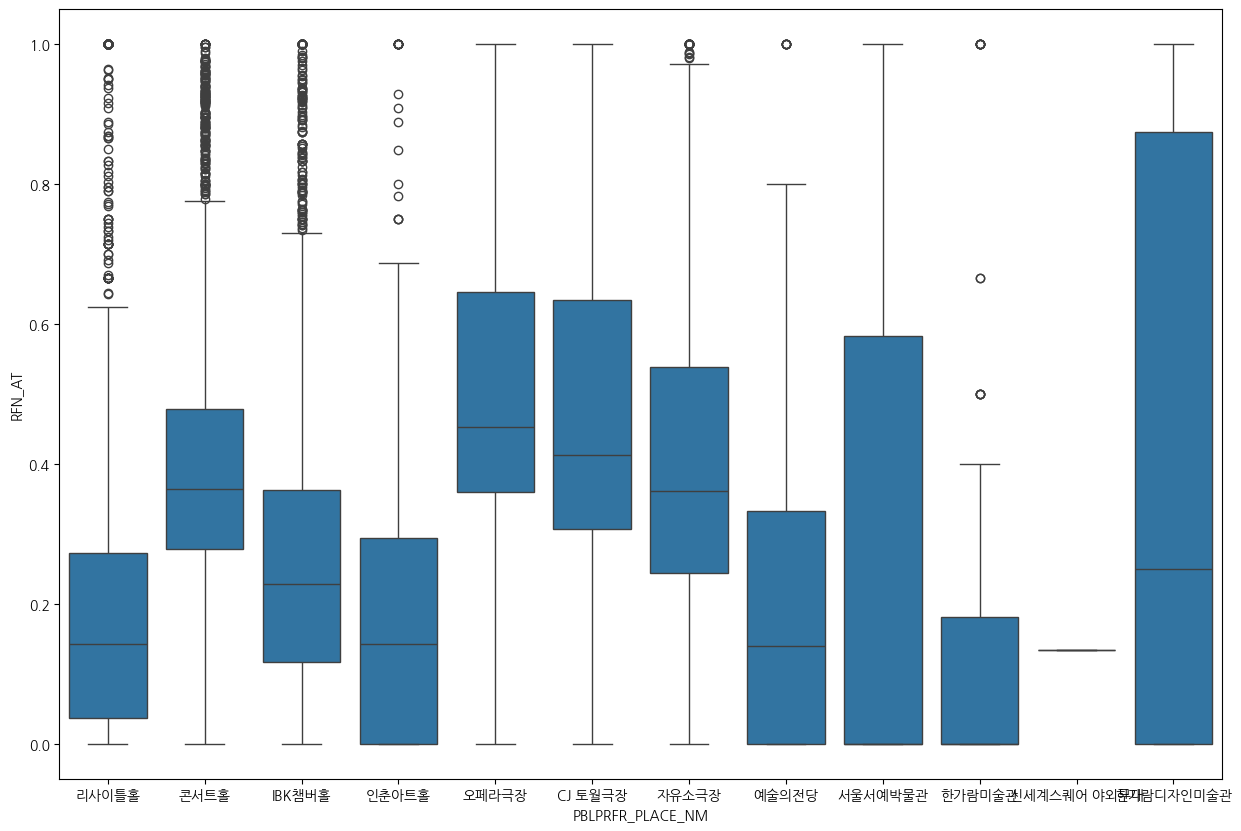

In [37]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(box, x='PBLPRFR_PLACE_NM', y='RFN_AT')
plt.show()

In [38]:
def find_max_value(df):
  Q1 = df['RFN_AT'].quantile(0.25)
  Q3 = df['RFN_AT'].quantile(0.75)
  IQR = Q3 - Q1
  max_value = Q3 + 1.5 * IQR
  return max_value

max_values = box.groupby('PBLPRFR_PLACE_NM').apply(find_max_value).reset_index()

max_values


<ipython-input-38-361bca52edc2>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_values = box.groupby('PBLPRFR_PLACE_NM').apply(find_max_value).reset_index()


,PBLPRFR_PLACE_NM,0
0,CJ 토월극장,1.125142
1,IBK챔버홀,0.732620
2,리사이틀홀,0.626263
3,서울서예박물관,1.458333
4,신세계스퀘어 야외무대,0.135135
5,예술의전당,0.833333
6,오페라극장,1.075357
7,인춘아트홀,0.735294
8,자유소극장,0.980652
9,콘서트홀,0.776776


In [39]:
max_values.columns = ['PBLPRFR_PLACE_NM', 'max_value']
max_values


,PBLPRFR_PLACE_NM,max_value
0,CJ 토월극장,1.125142
1,IBK챔버홀,0.732620
2,리사이틀홀,0.626263
3,서울서예박물관,1.458333
4,신세계스퀘어 야외무대,0.135135
5,예술의전당,0.833333
6,오페라극장,1.075357
7,인춘아트홀,0.735294
8,자유소극장,0.980652
9,콘서트홀,0.776776


In [40]:
# prompt: max_values['max_value'] 보다 높은 box 데이터들만 뽑아줘

# max_values['max_value'] 보다 높은 box 데이터들만 뽑아서 new_box에 저장
new_box = pd.merge(box, max_values, on='PBLPRFR_PLACE_NM', how='left')
new_box = new_box[new_box['RFN_AT'] > new_box['max_value']]

# new_box 출력
new_box = new_box[new_box['PBLPRFR_PLACE_NM'].isin(['IBK챔버홀', '콘서트홀'])]
croll = new_box[~new_box['PBLPRFR_NM'].str.contains('공연취소')]
croll

,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,RFN_AT,max_value
70,2015 CBS갈라콘서트 아름다운 열정,콘서트홀,2015-03-16,0.804734,0.776776
74,2015 The One&Only 문화나눔콘서트,IBK챔버홀,2015-11-18,0.891892,0.732620
125,2015 앙상블 뉴화인아트 정기연주회,IBK챔버홀,2015-06-26,0.963855,0.732620
134,2015 예술의전당 클래식 스타 시리즈 - 송영훈,IBK챔버홀,2015-12-18,0.846599,0.732620
157,2015 제33회 대한민국국제음악제(11.2),콘서트홀,2015-11-02,0.800000,0.776776
...,...,...,...,...,...
14000,홍종화 바이올린 독주회,IBK챔버홀,2015-10-05,1.000000,0.732620
14062,화음챔버오케스트라 현대음악 렉처 콘서트 시리즈 Ⅰ,IBK챔버홀,2020-03-05,1.000000,0.732620
14063,화음챔버오케스트라 현대음악 렉처콘서트 시리즈 Ⅲ,IBK챔버홀,2020-12-13,1.000000,0.732620
14066,화음챔버오케스트라의 현대음악 시리즈 Ⅲ,IBK챔버홀,2020-09-03,1.000000,0.732620


In [41]:
# croll에 새로운 행을 추가, 이름은 result로, 값은 모두 Null로
croll['result'] = None
croll

<ipython-input-41-97c7b8d7618f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croll['result'] = None


,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,RFN_AT,max_value,result
70,2015 CBS갈라콘서트 아름다운 열정,콘서트홀,2015-03-16,0.804734,0.776776,None
74,2015 The One&Only 문화나눔콘서트,IBK챔버홀,2015-11-18,0.891892,0.732620,None
125,2015 앙상블 뉴화인아트 정기연주회,IBK챔버홀,2015-06-26,0.963855,0.732620,None
134,2015 예술의전당 클래식 스타 시리즈 - 송영훈,IBK챔버홀,2015-12-18,0.846599,0.732620,None
157,2015 제33회 대한민국국제음악제(11.2),콘서트홀,2015-11-02,0.800000,0.776776,None
...,...,...,...,...,...,...
14000,홍종화 바이올린 독주회,IBK챔버홀,2015-10-05,1.000000,0.732620,None
14062,화음챔버오케스트라 현대음악 렉처 콘서트 시리즈 Ⅰ,IBK챔버홀,2020-03-05,1.000000,0.732620,None
14063,화음챔버오케스트라 현대음악 렉처콘서트 시리즈 Ⅲ,IBK챔버홀,2020-12-13,1.000000,0.732620,None
14066,화음챔버오케스트라의 현대음악 시리즈 Ⅲ,IBK챔버홀,2020-09-03,1.000000,0.732620,None


# 크롤링단계

In [42]:
from bs4 import BeautifulSoup as bs

In [43]:
croll

,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,RFN_AT,max_value,result
70,2015 CBS갈라콘서트 아름다운 열정,콘서트홀,2015-03-16,0.804734,0.776776,None
74,2015 The One&Only 문화나눔콘서트,IBK챔버홀,2015-11-18,0.891892,0.732620,None
125,2015 앙상블 뉴화인아트 정기연주회,IBK챔버홀,2015-06-26,0.963855,0.732620,None
134,2015 예술의전당 클래식 스타 시리즈 - 송영훈,IBK챔버홀,2015-12-18,0.846599,0.732620,None
157,2015 제33회 대한민국국제음악제(11.2),콘서트홀,2015-11-02,0.800000,0.776776,None
...,...,...,...,...,...,...
14000,홍종화 바이올린 독주회,IBK챔버홀,2015-10-05,1.000000,0.732620,None
14062,화음챔버오케스트라 현대음악 렉처 콘서트 시리즈 Ⅰ,IBK챔버홀,2020-03-05,1.000000,0.732620,None
14063,화음챔버오케스트라 현대음악 렉처콘서트 시리즈 Ⅲ,IBK챔버홀,2020-12-13,1.000000,0.732620,None
14066,화음챔버오케스트라의 현대음악 시리즈 Ⅲ,IBK챔버홀,2020-09-03,1.000000,0.732620,None


In [69]:
for cr in croll['PBLPRFR_NM']:
  url = f"https://www.sac.or.kr/site/main/search/search?%23=0&query={cr}&target=3"
  res = requests.get(url)

  soup = bs(res.content, 'html.parser')
  title = soup.select(".title")
  tl = soup.select(".tl b")
  cwa = soup.select(".cwa-tab li span")
  cwa1 = cwa[1].text
  cwa_num = int(cwa1.strip("()"))

  if(cwa_num > 0):
    croll.loc[croll['PBLPRFR_NM'] == cr, 'result'] = False
    continue


  for t in title:
    if ('공연취소' in t.text) | ('취소' in t.text) | ('연기' in t.text):
      print(f"{t.text}는 공연 취소되었습니다.")
      croll.loc[croll['PBLPRFR_NM'] == cr, 'result'] = True
      break
    else:
      croll.loc[croll['PBLPRFR_NM'] == cr, 'result'] = None



전당소식
[공연취소] (5.17) 2020 리스트 국제 피아노 콩쿠르 위너 인 서울
2020/03/18~2020/05/17
는 공연 취소되었습니다.

전당소식
[공연취소] (5.30~6.5) 2020 서울국제음악제 에머슨 사중주단 베토벤 현악사중주 전곡 연주
2020/03/26~2020/06/05
는 공연 취소되었습니다.

전당소식
[공연취소] (5.30~6.5) 2020 서울국제음악제 에머슨 사중주단 베토벤 현악사중주 전곡 연주
2020/03/26~2020/06/05
는 공연 취소되었습니다.

전당소식
[공연취소] (2/28) KBS교향악단 제751회 정기연주회
2020/02/25~2020/03/05
는 공연 취소되었습니다.

전당소식
[공연취소] (2.3) 당 타이 손 렉쳐 리사이틀 (2023 서울 피아노 아카데미)
2023/01/31~2023/02/03
는 공연 취소되었습니다.

전당소식
[공연취소] (3.1) 레볼루션
2023/02/22~2023/03/01
는 공연 취소되었습니다.

전당소식
[공연취소] (3/21) 레이프 오베 안스네스 피아노 리사이틀
2019/03/05~2019/03/21
는 공연 취소되었습니다.

전당소식
[공연취소] (12.19) 〈리처드 용재 오닐의 선물 : 더 바로크 나이트〉 공연 취소 안내
2021/12/10~2021/12/19
는 공연 취소되었습니다.

전당소식
마우리치오 폴리니 피아노 리사이틀(5.19 & 5.25) 예매취소 및 환불 안내
2022/05/18~2022/05/25
는 공연 취소되었습니다.

전당소식
마우리치오 폴리니 피아노 리사이틀(5.19 & 5.25) 예매취소 및 환불 안내
2022/05/18~2022/05/25
는 공연 취소되었습니다.

전당소식
[공연취소] (2/16) 베토벤 탄생 250주년 기념 서초교향악단 정기연주회
2020/02/13~2020/02/16
는 공연 취소되었습니다.

전당소식
[공연취소] (8.29) 이상 트리오 - The Triad
2020/08/11~2020/08/29
는 공연

In [70]:
croll

,PBLPRFR_NM,PBLPRFR_PLACE_NM,PBLPRFR_DE,RFN_AT,max_value,result
70,2015 CBS갈라콘서트 아름다운 열정,콘서트홀,2015-03-16,0.804734,0.776776,False
74,2015 The One&Only 문화나눔콘서트,IBK챔버홀,2015-11-18,0.891892,0.732620,False
125,2015 앙상블 뉴화인아트 정기연주회,IBK챔버홀,2015-06-26,0.963855,0.732620,False
134,2015 예술의전당 클래식 스타 시리즈 - 송영훈,IBK챔버홀,2015-12-18,0.846599,0.732620,False
157,2015 제33회 대한민국국제음악제(11.2),콘서트홀,2015-11-02,0.800000,0.776776,False
...,...,...,...,...,...,...
14000,홍종화 바이올린 독주회,IBK챔버홀,2015-10-05,1.000000,0.732620,False
14062,화음챔버오케스트라 현대음악 렉처 콘서트 시리즈 Ⅰ,IBK챔버홀,2020-03-05,1.000000,0.732620,None
14063,화음챔버오케스트라 현대음악 렉처콘서트 시리즈 Ⅲ,IBK챔버홀,2020-12-13,1.000000,0.732620,None
14066,화음챔버오케스트라의 현대음악 시리즈 Ⅲ,IBK챔버홀,2020-09-03,1.000000,0.732620,None


In [71]:
file_save = DATA_PATH + 'crolling_result.csv'
croll.to_csv(file_save, index=False)